## importing the library's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

from  sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

## Loading the data set

In [2]:
data =  pd.read_csv('Project_Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <b>Type of features</b> :
### <b>Categorical</b> : Sex , Embarked
### <b>Continuos</b> :  Age , Fare
### <b>Discrete</b> :  SibSp , 	Parch
### <b>Alphanumeric</b> : Ticket

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


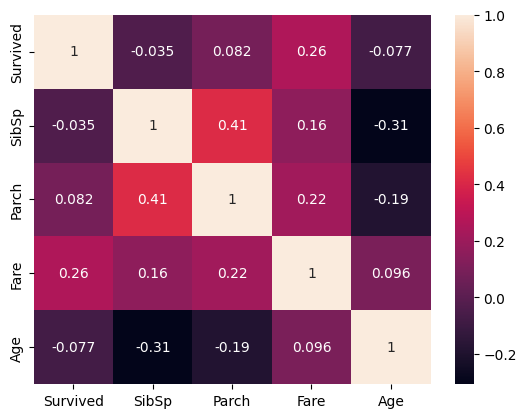

In [6]:
# checking the corelation between the parameters like if the are important or not
# we are plotting the heat map


heatmap = sns.heatmap(data[['Survived' , 'SibSp' , 'Parch' , 'Fare' , 'Age']].corr(),annot = True)

### SibSp -- > number of sibling/spouse abord the titanic


In [7]:
data['SibSp'].nunique()

7

In [8]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

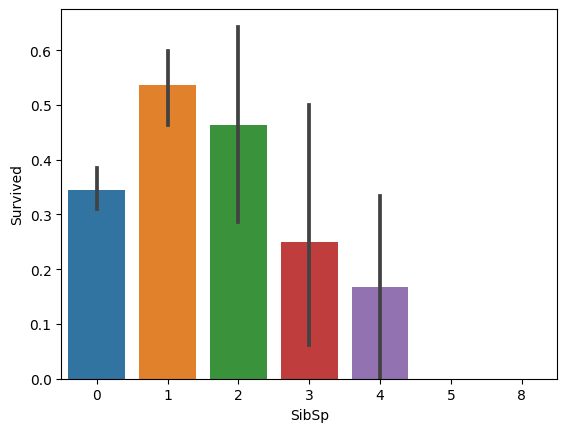

In [9]:
sns.barplot(x = 'SibSp' , y = 'Survived', data = data )
plt.show()


## Age 

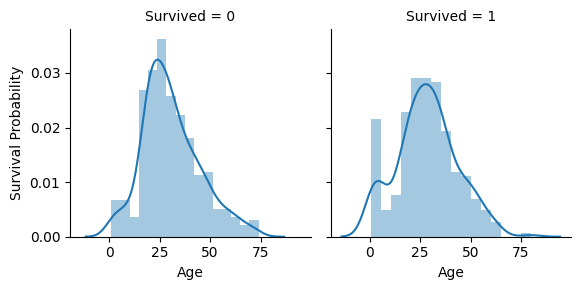

In [10]:
age_visual = sns.FacetGrid(data , col='Survived')

age_visual = age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

## Gender or sex

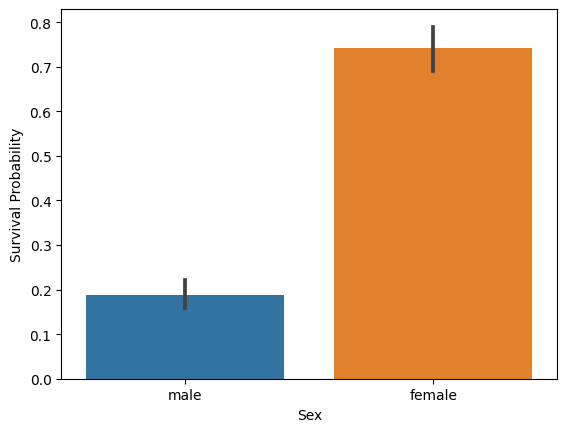

In [11]:
sns.barplot(x='Sex',y='Survived',data = data ).set_ylabel("Survival Probability")
plt.show()

In [12]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color='green'>Pclass OR passanger class</font>

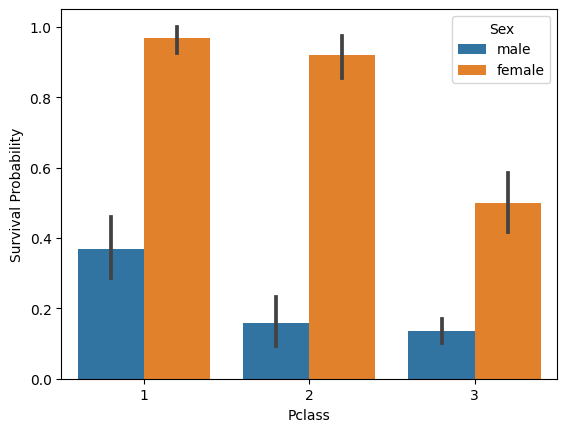

In [13]:
Pclass = sns.barplot(x = 'Pclass' , y = 'Survived', data = data ,hue='Sex')

Pclass = Pclass.set_ylabel("Survival Probability")

## <font color = 'Green'>Embarked</font>

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
data['Embarked']=data['Embarked'].fillna("S")

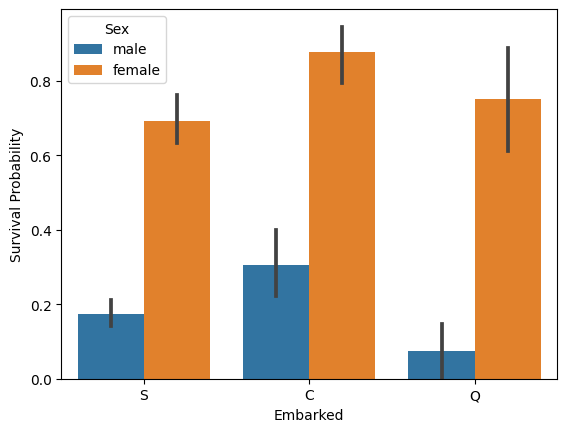

In [17]:
Embarked= sns.barplot(x = 'Embarked' , y = 'Survived', data = data ,hue='Sex')

Embarked = Embarked.set_ylabel("Survival Probability")

In [18]:
# Exploring  Pclass Vs Embarked
# q= sns.factorplot("Pclass",col = "Embarked" , data = data , kind = "count")

# q.despine(left = Ture)

# q = q.set_ylabel("count")

In [19]:
# q=sns.factorplot("Sex" ,  col = "Embarked" , data = data, size = 7 , kind = " count")

### preparing the data

In [20]:
data = pd.read_csv("Project_Titanic.csv")

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# as we have many null value in the Age parameter
# And it is also very strong parameter so we cannot remove it
# and filling the mean vales wouldn't be a fair option
# So we will See the age visualization we have done above and consider the NOrmal Standard Deviation from
# the bell shaped graph and fill the data null data within the specific range from the visualization randomly
#65% values lie between (mean+std , mean-std)

# calculating the mean
mean =  data['Age'].mean()

# calculating the standard deviation
std = data['Age'].std()
# calculating the null values
is_null = data['Age'].isnull().sum()

In [24]:
print(mean,std,is_null)

29.69911764705882 14.526497332334042 177


In [25]:
random_age = np.random.random_integers(mean-std,mean+std , size=is_null)

In [26]:
random_age

array([27, 29, 21, 37, 17, 33, 42, 35, 19, 42, 44, 25, 32, 39, 19, 21, 15,
       42, 40, 17, 39, 37, 31, 26, 40, 27, 29, 22, 38, 24, 23, 43, 22, 33,
       18, 30, 19, 36, 21, 17, 30, 29, 41, 31, 39, 42, 33, 26, 25, 30, 19,
       29, 24, 38, 18, 16, 25, 22, 15, 26, 37, 18, 43, 31, 19, 21, 42, 26,
       30, 42, 22, 40, 22, 42, 33, 16, 26, 23, 30, 39, 32, 39, 42, 17, 27,
       44, 27, 39, 17, 43, 34, 34, 27, 16, 43, 30, 20, 34, 34, 31, 42, 22,
       19, 24, 44, 25, 32, 19, 30, 39, 31, 23, 41, 33, 21, 19, 33, 20, 15,
       36, 37, 33, 20, 25, 26, 44, 17, 21, 38, 44, 36, 42, 37, 37, 30, 17,
       29, 26, 15, 24, 42, 30, 42, 35, 26, 27, 39, 17, 21, 35, 39, 26, 35,
       21, 18, 21, 20, 43, 28, 30, 36, 23, 36, 20, 15, 29, 43, 27, 33, 18,
       34, 25, 35, 18, 31, 17, 19])

## for doing the testing of code

In [27]:
a = data['Age'].copy()
a[np.isnan(a)] = random_age

In [28]:
# now we have a complete data
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
np.isnan(a)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [30]:
a[np.isnan(a)]   # it will produce all the index where it has null values

Series([], Name: Age, dtype: float64)

In [31]:
#<----------------------------------------Now coding--------------------------------------------------------->

In [32]:
a = data['Age'].copy()
a[np.isnan(a)] = random_age
data['Age'] = a

In [33]:
data['Age'].isnull().sum()

0

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data['Embarked'] = data['Embarked'].fillna('S')

In [36]:
# Now dropping the unwanted columns
col_to_drop = ["Cabin","Ticket","PassengerId","Name","Parch","Fare"]
data.drop(col_to_drop, axis=1,inplace=True)

In [37]:
# now mapping our variable values to the number
Gender = {"male" : 0 , "female":1}
data['Sex'] = data["Sex"].map(Gender)

In [38]:
# dong he same for our Embarkments or ports
ports = {"S" : 0 , "C": 1 , "Q" : 2}
data['Embarked'] = data["Embarked"].map(ports)

In [39]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,1
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


# Splitting up the data

In [40]:
x = data.drop(data.columns[0],axis=1)
y = data['Survived']

In [41]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.4 , random_state=0)

## Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Classification

In [43]:
log_reg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [44]:
log_reg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train,y_train)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [45]:
log_reg_ypred = log_reg.predict(x_test)
svc_classifier_ypred = svc_classifier.predict(x_test)
dt_classifier_ypred = dt_classifier.predict(x_test)
knn_classifier_ypred = knn_classifier.predict(x_test)
rf_classifier_ypred = rf_classifier.predict(x_test)

In [46]:

from sklearn.metrics import accuracy_score

log_reg_acc        = accuracy_score(y_test,log_reg_ypred)
svc_classifier_acc = accuracy_score(y_test,svc_classifier_ypred)
dt_classifier_acc  = accuracy_score(y_test,dt_classifier_ypred)
knn_classifier_acc = accuracy_score(y_test,knn_classifier_ypred)
rf_classifier_acc  = accuracy_score(y_test,rf_classifier_ypred)

In [47]:
print("Logistic regression : " , round(log_reg_acc*100,2))   # calculated till 2 decimal places
print("support vector classifier : " , round(svc_classifier_acc*100,2))
print("decision tree classifier : " , round(dt_classifier_acc*100,2))
print("K-nearest neighbor : " , round(knn_classifier_acc*100,2))
print("Random Forest : " , round(rf_classifier_acc*100,2))

Logistic regression :  79.55
support vector classifier :  82.35
decision tree classifier :  74.23
K-nearest neighbor :  79.27
Random Forest :  76.75
